## Introduction
The following data set originally comes from `https://catalog.data.gov/dataset/real-estate-sales-10012020-to-current`, and the description reads: "***Hartford Real Estate Sales** from October 1, 2020 provided by the City of Hartford Assessor's Office. Updated Nightly.*" The purpose of this project is to demonstrate adequate SQL usage and integrate its functions alongside Python to create an analysis. In the end, I hope to create an informative analysis that can provide insight and predict future trend models.

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


original_df = pd.read_csv('Real_Estate_Sales_10012020_to_Current.csv')
original_df.drop(columns='OBJECTID')

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,...,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID,AssrLandUse,GlobalID
0,8,3,6.0,121-698-063,77,NaN,STAFFORD ST,2,6000.0,1092.00000,...,LAKESHA,SCOTT NASTASSIA,2024/07/01 00:00:00+00,259000.0,187200,08275 0343,1,10,ONE FAMILY,{78B6AAB5-D21E-471C-85BE-022DAB2A80B7}
1,9,3,3.0,121-698-062,73,NaN,STAFFORD ST,2,6000.0,936.00000,...,ARCADIO,DIAZ RAFAEL,2022/04/26 00:00:00+00,208000.0,192300,07948-0001,1,10,ONE FAMILY,{15F34650-E463-4047-8808-A056FCDA3E09}
2,12,3,6.0,144-698-066,61,NaN,STAFFORD ST,2,6000.0,1111.00000,...,CATIRIA,KERN THOMAS,2023/12/22 00:00:00+00,125000.0,148400,08197-0077,1,10,ONE FAMILY,{C6FCA409-022A-4F1B-A674-13996FD1FE86}
3,20,3,6.0,144-698-058,29,NaN,STAFFORD ST,2,6000.0,1096.00000,...,REBECA,RAMOS MIGUEL JR,2023/09/29 00:00:00+00,1.0,167300,08158 0179,5,8,ONE FAMILY,{4D1DDED3-EF58-4091-A5F1-C7CA38B38C74}
4,25,3,6.0,144-698-053,211,NaN,NEWINGTON AVE,2,5040.0,1684.00000,...,LOURDES,BAIJANATH BISSNOW P,2021/01/11 00:00:00+00,177000.0,197900,07701-0245,1,10,ONE FAMILY,{F2E9A7CC-96D2-47AE-A2C1-59745FBE9C9E}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,29769,7,18.0,161-503-064,98,B,BROOKFIELD ST,512,0.0,1668.80001,...,TAMMIE,ABEL QUALITY CONSTRUCTION LLC,2024/04/22 00:00:00+00,315000.0,249500,08242 0210,1,10,CONDOMINIMUM,{807D4D88-119F-478B-8783-2FCB6854D106}
7406,29769,7,18.0,161-503-064,98,B,BROOKFIELD ST,512,0.0,1668.80001,...,TAMMIE,ABEL QUALITY CONSTRUCTION LLC,2024/05/17 00:00:00+00,0.0,249500,08251 0180,5,18,CONDOMINIMUM,{CA3871C1-EC6B-47AD-85B2-A93C8E4E49C8}
7407,29769,7,18.0,161-503-064,98,B,BROOKFIELD ST,512,0.0,1668.80001,...,TAMMIE,BURGOS ISAAC,2024/08/26 00:00:00+00,0.0,249500,08296 0073,5,8,CONDOMINIMUM,{BF5642DB-2E1E-49E5-91BE-ABD301FB052E}
7408,29770,7,18.0,161-503-065,98,C,BROOKFIELD ST,512,0.0,1676.80001,...,EDUARDO,ABEL QUALITY CONSTRUCTION LLC,2024/04/22 00:00:00+00,315000.0,249800,08242 0248,1,10,CONDOMINIMUM,{8B22BA6B-345F-4E00-8CFE-916BC92B6F32}


As we can see above, the original data set contains **22 columns** along with **7410 rows**, and at first glance, it seems a bit excessive. However, using SQL, we can actually drop and filter columns that are irrelevant to the types of analysis that we will later do. In addition, we can actually organize the data by time to make it a bit more comprehensible.


In [2]:
# Translating SQL Query into Python

conn = sqlite3.connect('RealEstateSales.db')

query = """         
SELECT  "ParcelID",
        "StreetNameAndWay", 
        "LandSF", 
        "TotalFinishedArea", 
        "LivingUnits", 
        "SaleDate", 
        "SalePrice", 
        "TotalAppraisedValue", 
        "AssrLandUse"
FROM Real_Estate_Sales_10012020_to_Current
ORDER BY "SaleDate" ASC;
"""

df = pd.read_sql_query(query, conn)
conn.close()

df

,ParcelID,StreetNameAndWay,LandSF,TotalFinishedArea,LivingUnits,SaleDate,SalePrice,TotalAppraisedValue,AssrLandUse
0,230-653-002,MAPLE AVE,11024.0,4075.50000,3.0,2020/10/01 00:00:00+00,325000,319400,THREE FAMILY
1,252-683-253,FRANKLIN AVE,NaN,546.00000,1.0,2020/10/01 00:00:00+00,38000,45000,CONDOMINIMUM
2,109-298-038,NORTH BEACON ST,8208.0,3248.75000,1.0,2020/10/01 00:00:00+00,409900,406900,ONE FAMILY
3,154-181-081,WOODSIDE CIR,156200.0,9424.00000,2.0,2020/10/01 00:00:00+00,850000,1171400,MULTI DWLG
4,154-181-081,WOODSIDE CIR,156200.0,9424.00000,2.0,2020/10/01 00:00:00+00,850000,1171400,MULTI DWLG
...,...,...,...,...,...,...,...,...,...
7405,165-598-113,BROADVIEW TER,7500.0,1821.20001,1.0,2024/09/30 00:00:00+00,None,191200,ONE FAMILY
7406,189-747-131,FREEMAN ST,7900.0,3642.40001,2.0,2024/09/30 00:00:00+00,453000,292300,TWO FAMILY
7407,211-755-081,TORWOOD ST,18000.0,2521.00000,1.0,2024/09/30 00:00:00+00,0,309500,ONE FAMILY
7408,277-809-020,GOODRICH ST,5050.0,1428.00001,1.0,2024/09/30 00:00:00+00,None,178300,ONE FAMILY


## Exploring Missing Data
Now that we have used SQL, the data set looks a lot better, and contains only potentially relevant information. Despite that however, it still appears to contain missing data, which will definitely be a problem in our later analysis. After further inspection, it also appears to contain too many missing values to simply overlook and ignore, therefore we need to investigate the correlation amongst these missing values. Below summarizes the amount of missing values and under which column:

In [3]:
df.isnull().sum()

ParcelID                  0
StreetNameAndWay          0
LandSF                 1931
TotalFinishedArea       173
LivingUnits               1
SaleDate                  0
SalePrice               339
TotalAppraisedValue       0
AssrLandUse               0
dtype: int64

## Exploring Missing Data: LandSF

As you can read, the column: `LandSF` contains **1931 NULL data**, which is very significant considering the data set's size. Using SQL to filter, we can narrow our observation to all rows where `LandSF` is **NULL**, along with their additional values. With a closer look, we can even start to notice a trend between the missing values in `LandSF` and `AssrLandUse`.

In [4]:
conn1 = sqlite3.connect('RealEstateSales.db')

query1 = """
SELECT  "ParcelID",
        "StreetNameAndWay", 
        "LandSF", 
        "TotalFinishedArea", 
        "LivingUnits", 
        "SaleDate", 
        "SalePrice", 
        "TotalAppraisedValue", 
        "AssrLandUse"
FROM Real_Estate_Sales_10012020_to_Current
WHERE "LandSF" IS NULL;
"""

LandSF_null = pd.read_sql_query(query1, conn1)
conn1.close()

LandSF_null

,ParcelID,StreetNameAndWay,LandSF,TotalFinishedArea,LivingUnits,SaleDate,SalePrice,TotalAppraisedValue,AssrLandUse
0,122-700-001,MARION ST,None,797.0,1,2022/01/03 00:00:00+00,74500,72000,CONDOMINIMUM
1,122-700-002,MARION ST,None,797.0,1,2023/11/30 00:00:00+00,85000,68100,CONDOMINIMUM
2,122-700-002,MARION ST,None,797.0,1,2023/11/22 00:00:00+00,None,68100,CONDOMINIMUM
3,122-700-003,MARION ST,None,797.0,1,2023/09/28 00:00:00+00,125000,81900,CONDOMINIMUM
4,122-700-003,MARION ST,None,797.0,1,2023/01/26 00:00:00+00,98000,81900,CONDOMINIMUM
...,...,...,...,...,...,...,...,...,...
1926,207-575-107,NEW BRITAIN AVE,None,485.0,1,2022/05/02 00:00:00+00,3259570,30400,CONDOMINIMUM
1927,207-575-108,NEW BRITAIN AVE,None,485.0,1,2022/05/02 00:00:00+00,3259570,30400,CONDOMINIMUM
1928,207-575-109,NEW BRITAIN AVE,None,485.0,1,2022/05/02 00:00:00+00,3259570,30400,CONDOMINIMUM
1929,271-461-021,CHARTER OAK PL,None,1178.0,1,2023/05/19 00:00:00+00,261650,191300,CONDOMINIMUM


Using Python to further investigate, we can summarize the amount of unique values of `AssrLandUse` for every value where `LandSF` is **NULL**. With this new summary, we can clearly see that every missing value in `LandSF` has the property listed as being used for Condos, which makes sense logically speaking. In a sense, there is no available data for **Land Square Footage (LandSF)** if the property is being rented instead of purchased, which would obviously lead to every data being present in Condos, except for **Land Square Footage (LandSF)**.

In [5]:
(LandSF_null['AssrLandUse'].value_counts()).reset_index()

,AssrLandUse,count
0,CONDOMINIMUM,1758
1,CONDO GARAGE,173


## Exploring Missing Data: TotalFinishedArea

One thing I noticed when evaluating the original data set were some of the confusing column names and their meanings, most notably: `TotalFinishedArea`. As someone with minimal knowledge on Real Estate, obvious questions that first came to mind were: **"Does this mean that the area is under construction?"**, **"How is this different than `LandSF`?"**, **"Why do some properties have this but others don't?".** Keeping these in mind, we can actually use SQL and Python to evaluate and create context to the data's meaning, without having to look anything up.   

In [6]:
conn2 = sqlite3.connect('RealEstateSales.db')

query2 = """
SELECT  "ParcelID",
        "LandSF", 
        "TotalFinishedArea", 
        "LivingUnits",   
        "AssrLandUse"
FROM Real_Estate_Sales_10012020_to_Current
WHERE "TotalFinishedArea" IS NULL;
"""

TotalFinishedArea_null = pd.read_sql_query(query2, conn2)
conn2.close()

TotalFinishedArea_null

,ParcelID,LandSF,TotalFinishedArea,LivingUnits,AssrLandUse
0,249-557-344,NaN,None,0.0,CONDO GARAGE
1,249-558-209,NaN,None,0.0,CONDO GARAGE
2,249-558-212,NaN,None,0.0,CONDO GARAGE
3,249-558-213,NaN,None,0.0,CONDO GARAGE
4,249-558-214,NaN,None,0.0,CONDO GARAGE
...,...,...,...,...,...
168,246-363-734,NaN,None,0.0,CONDO GARAGE
169,246-363-738,NaN,None,0.0,CONDO GARAGE
170,246-363-738,NaN,None,0.0,CONDO GARAGE
171,246-363-739,NaN,None,0.0,CONDO GARAGE


In [7]:
print((TotalFinishedArea_null['LivingUnits'].value_counts()).reset_index())
print()
print()
print((TotalFinishedArea_null['AssrLandUse'].value_counts()).reset_index())

   LivingUnits  count
0          0.0    172


    AssrLandUse  count
0  CONDO GARAGE    172
1  CONDOMINIMUM      1


Using the same method of filtering through SQL, we're able to evaluate missing values in `TotalFinishedArea`, and produce the summary above.  
Interpreting this, we can read as follows:  
1.) Almost all missing values in `TotalFinishedArea` have 0 living units   
2.) Almost all missing values in `TotalFinishedArea` are being used for a Condo Garage.  
As mentioned previously, we can understand the meaning of this data solely using context, without having to look up anything. In conclusion, we can accurately interpret `TotalFinishedArea` as the square footage of living space for occupancy. This makes sense logically, because a **CONDO GARAGE** is used for storage and not living. (*Think about how square footage of a property is different than square footage of living space.*)   
  
  
Fortunately, we can also use these results to answer our initial questions:    
   
**"Does this mean that the area is under construction?:"** *No, the properties are actually fully built*   

**"How is this different than `LandSF`?:"** *`LandSF` refers to square footage of property while `Total Finished Area` refers to square footage of living space.*  

**"Why do some properties have this but others don't?:".** *Depending on what its being used for, some properties will not have any values for `Total Finished Area`.*

## Exploring Missing Data: SalePrice

Finally, utilizing our familar process once again, we can accurately interpret why `SalePrice` contains missing data. To begin, we first have to filter out any missing sale prices that are being used for **CONDOMINIUM** and **CONDO GARAGE.** This is because of the general understanding that these types of estates are typically being rented out instead of purchased. (*Not to confuse with actual purchased Condos present in this data set*) 

In [8]:
conn3 = sqlite3.connect('RealEstateSales.db')

query3 = """
SELECT  "ParcelID",
        "StreetNameAndWay", 
        "LandSF", 
        "TotalFinishedArea", 
        "LivingUnits", 
        "SaleDate", 
        "SalePrice", 
        "TotalAppraisedValue", 
        "AssrLandUse"
FROM Real_Estate_Sales_10012020_to_Current
WHERE "SalePrice" IS NULL
AND "AssrLandUse" NOT IN ("CONDOMINIMUM", "CONDO GARAGE")
"""

SalePrice_null = pd.read_sql_query(query3, conn3)
conn3.close()

SalePrice_null

,ParcelID,StreetNameAndWay,LandSF,TotalFinishedArea,LivingUnits,SaleDate,SalePrice,TotalAppraisedValue,AssrLandUse
0,121-698-075,BRISTOL ST,6188,1096.0,1,2023/06/21 00:00:00+00,None,179500,ONE FAMILY
1,121-698-074,BRISTOL ST,6000,1288.0,1,2023/11/13 00:00:00+00,None,152000,ONE FAMILY
2,121-697-013,HOLLYWOOD AVE,5500,945.0,1,2024/09/03 00:00:00+00,None,176300,ONE FAMILY
3,121-702-043,GRANT ST,5650,1587.0,1,2024/07/15 00:00:00+00,None,207000,ONE FAMILY
4,120-704-109,GRANT ST,5650,1792.0,1,2024/01/26 00:00:00+00,None,262800,ONE FAMILY
...,...,...,...,...,...,...,...,...,...
280,139-497-040,COLEMAN DR,7147,1470.0,1,2024/04/22 00:00:00+00,None,221000,ONE FAMILY
281,139-497-040,COLEMAN DR,7147,1470.0,1,2024/04/22 00:00:00+00,None,221000,ONE FAMILY
282,139-496-019,PULASKI DR,9938,1470.0,1,2024/07/19 00:00:00+00,None,216500,ONE FAMILY
283,239-116-164,WESTLAND ST,9350,2376.0,2,2022/02/14 00:00:00+00,None,280100,TWO FAMILY


Following this, I begin to suspect that the same logic for Condos can be applied to these specific properties. However, that has to be proven. One such detail that leads me to this comes largely from the `SaleDate`. What this data indicates is that some form of purchase was involved, which automatically excludes the possibility of the property not being sold to explain its missing `SalePrice`. Furthermore, I noticed that a lot of the rows contained identical street names, which possibly hints towards "Cookie-cutter Neighborhoods" or "Tract Housing." To confirm this, we are required to do some outside research and investigate. To begin, I first wanted to see if there was any context I can pull from the data set's original postings at *https://catalog.data.gov/dataset/real-estate-sales-10012020-to-current*. Reading the description, I am reminded of the data set's source: **The City of Hartford**, which leads me to investigate **The City of Hartford's GIS**. Doing so, I am then led to their Property Interactive Map, where I can confirm my suspicions: similar and minimalistic houses that are intended to be rented out. In the end, I can conclude that the missing sales prices for these particular properties are indeed due to them being rented.

## Visualize The Data

With the context of these missing values solved, we can now begin to visualize the data under certain criterias to hopefully discover any insights and statistics. Before that, its also important to filter the data beyond its missing values, specifically data that may skew the statistics. For instance, `SalePrice` contains quite a bit of outliers, with the following being a few that I noticed:   
1.) Some rows having 2M+ sale prices  
2.) Instances where multiple properties are being bought, but their saleprice is the total amount, creating multiple rows with 1M+ sales price but their individual values are 80K+.  
3.) Some rows have 0 or 1 for sale prices.   
4.) 2500+ of rows with < 10000 sale price.

Considering this, the overall question that I want to address is "**whether people are buying more real estate over time**" and "**whether those prices are rising.**" With this goal in mind, its clear to see how duplicates and outlier purchases may inflate my findings.

## Are Real Estate Sales Increasing?

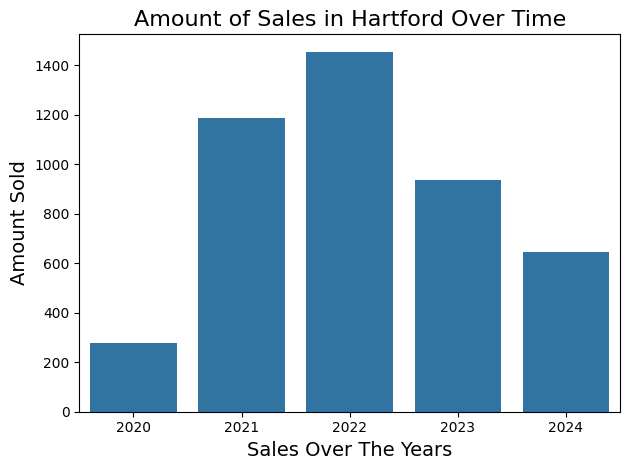

In [39]:
# SQL query translated in Python

conn4 = sqlite3.connect('RealEstateSales.db')
query4 = """
SELECT  "StreetNameAndWay",   
        "SaleDate", 
        "SalePrice", 
        "TotalAppraisedValue"
FROM Real_Estate_Sales_10012020_to_Current
WHERE SalePrice IS NOT NULL
AND SalePrice > 10000
ORDER BY "SaleDate" ASC;
"""

RealEstateSales = pd.read_sql_query(query4, conn4)
conn4.close()



# Creating Important Variables for Analysis

RealEstateSales['SaleYear'] = RealEstateSales['SaleDate'].str.split("/").str[0].astype(int)
Amount_Sales = RealEstateSales.groupby('SaleYear').size().reset_index(name='Count')


# Plotting our Data Frame

sns.barplot(data=Amount_Sales, x = 'SaleYear',y='Count')
plt.title('Amount of Sales in Hartford Over Time', fontsize=16)
plt.xlabel('Sales Over The Years', fontsize=14)
plt.ylabel('Amount Sold', fontsize=14)
plt.tight_layout()
plt.show()

## Interpretation
From looking at this Barplot, one detail that sticks out the most is the difference between 2020 and 2021. Using historical context, we can understand that 2020 was when the the Global Pandemic broke out, explaining the lack of sales during that year. Additionally, to explain the sudden burst occuring in 2021, we can actually quote *The Federal Reserve Bank of New York* (*https://libertystreeteconomics.newyorkfed.org/2021/09/the-housing-boom-and-the-decline-in-mortgage-rates/*) `"...Housing interest rates did drop in 2021. The 30-year fixed mortgage rate reached an all-time record low of 2.65% in January 2021 before surging to 7.79% in October 2023. This drop in rates was largely due to the Federal Reserve's actions to stabilize the economy amid the COVID-19 pandemic..."` Furthermore, historical context also explains the sudden drop in 2023, where the housing market began to see a sudden rise in home prices since the lower rates caused by the Pandemic.

## Are Real Estate Sale Prices Increasing?

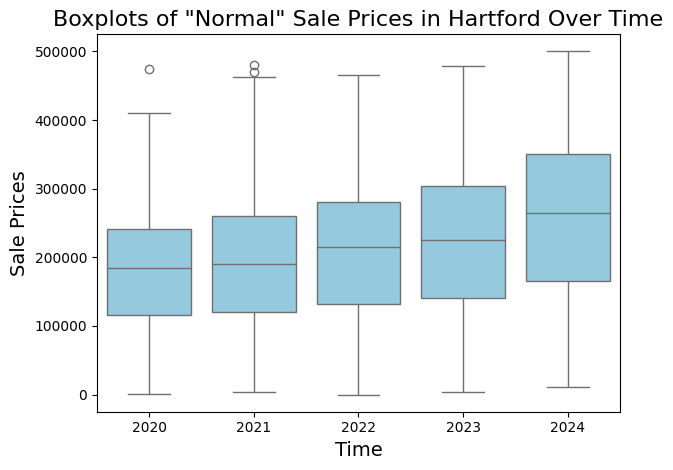

In [23]:
# Creating variables that are necessary to our analysis

RealEstateSales['SalePrice'] = RealEstateSales['SalePrice'].astype(float)



# To account for outliers, we can actually divide the data between "Expensive" and "Normal."
# Normal: Any Sale Prices below Half a Million
# Expensive: Any Sale Prices above Half a Million but below 2 Million 


Normal = RealEstateSales[RealEstateSales['SalePrice'] < 500000]
Expensive = RealEstateSales[(RealEstateSales['SalePrice'] > 500000) & (RealEstateSales['SalePrice'] < 2000000)]


# Creating our Boxplot for Normally Priced Real Estate Sales

sns.boxplot(data=Normal, x='SaleYear',y='SalePrice', color = 'skyblue')
plt.title('Boxplots of "Normal" Sale Prices in Hartford Over Time', fontsize=16)
plt.xlabel('Sales Over The Years', fontsize=14)
plt.ylabel('Sale Prices', fontsize=14)
plt.tight_layout()
plt.show()

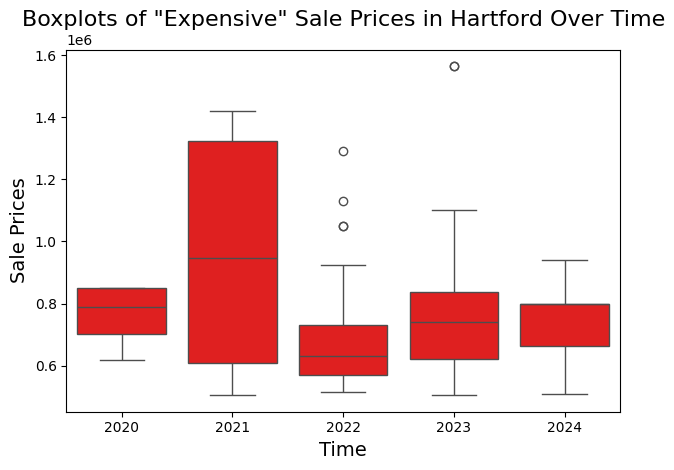

In [24]:
# Creating our Boxplot for Expensively Priced Real Estate Sales

sns.boxplot(data=Expensive, x='SaleYear',y='SalePrice', color = 'red')
plt.title('Boxplots of "Expensive" Sale Prices in Hartford Over Time', fontsize=16)
plt.xlabel('Sales Over The Years', fontsize=14)
plt.ylabel('Sale Prices', fontsize=14)
plt.tight_layout()
plt.show()

## Interpretation
Regarding **"Normally" priced Real Estate purchases**, we can clearly see that prices are indeed increasing. Comparing this to the Barplot containing "Amount of Sales in Hartford Over Time," we can associate that the decreasing amount of sales can possibly be contributed to the increasing amount of sale prices. Our boxplot also aligns with the context of the housing market during those times. As for the **"Expensively" priced Real Estate purchases**, we can see that the most amount of expensive purchases occured during 2021, which makes sense considering the record low housing-interest and mortgage rates during that time. What likely happened was the people/buisnesses purchasing expensive Real Estate in order to capitalize and take advantage of the recovering Housing Market.

## Predictions
Now that we've established our visual representation of the data, we can now make predictions on future trends or even current ones. For example, given the downward trend present in our Barplot and knowledge of increasing 2025 Housing Market Rates, I can make the prediction that 2025 Sale amounts will probably be seen around **low 500s** to **high 400s** in the Hartford, Conneticut area. Likewise, dividing the mean of a certain year by the mean of the previous year, we can actually calculate the percentage at which the sale prices increases by each year. Doing so, we get the following: `2020-2021 : 8.5%`, `2021-2022 : 8.1%`, `2022-2023 : 6.6%`, `2023-2024 : 16%`. Using this information along with the upward trend present in our Boxplot, I can predict that prices will be seen with an average of **$284,315**. (*Calculated using the average of the increase percentage of the following years: 9.8%*)

In [44]:
Normal.groupby('SaleYear').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
SaleYear,,,,,,,,
2020,259.0,178467.196911,85244.768102,500.0,116210.00,185000.0,241950.0,475000.0
2021,1092.0,193706.359982,93000.836164,3500.0,119985.00,190000.0,259625.0,480500.0
2022,1051.0,209396.301618,99168.795279,50.0,132250.00,215000.0,280250.0,465000.0
2023,868.0,223295.416002,102312.728579,3614.0,140803.75,225000.0,304250.0,479000.0
2024,616.0,258939.481461,117558.647841,11710.0,165000.00,265000.0,350000.0,499900.0


## Conclusions
- Trend in the Amount of Real Estate Sales in Hartford, CT
- Trend in the Prices of Real Estate Sales in Hartford, CT
- Predictions of The Amount and Prices of Real Estate Sales in Hartford, CT in 2025
- Missing Data Context